Please check the README before you proceed with reading this notebook.

In [1]:
#Importing unnecessary libraries and changing default parameters#

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams.update({'figure.figsize':(10,7),
                            'font.size': 12,
                            'figure.facecolor': 'FBFFE7'}) 

%matplotlib inline                          


In [2]:
#Loading data and checking for any irrelevant columns in terms of our project goal#
df = pd.read_csv('Cancer_Data.csv')
df
#Notice that column id has no relavant information#
#Let's check if columnn 'Unnamed: 32' has other values than NaN#

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df['Unnamed: 32'].nunique()
#In column 'Unnamed: 32', there are no other values than NaN#

0

In [4]:
#Therefore, we will drop columns 'id' and 'Unnamed: 32'#
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [5]:
df.columns #Checking columns of DataFrame#

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#Analyzing the ratio between benign and malignant diagnosis and representing it visually with a pie chart#
%matplotlib inline 
figure_diagnosis = px.pie(df, 'diagnosis', title='Benign | Malignant')
figure_diagnosis.show()
#In our dataset, around 37% of cancer cells are malignant and 63% are benign#

From now on, we'll use terms like "features" and "targets". When we say "features", we mean the numerical values used as input for the model. And when we say "targets", we are referring to the values the model is trying to predict.

In [7]:
#Defining helper function which we use to plot histograms in order to determine distribution of features#
#We use the keyword color='diagnosis' to visually assess the relationship between the diagnosis and various features#

def distribution_check(column_name):
    figure_test = px.histogram(df,
                           x=f'{column_name}',
                           color='diagnosis',
                           title=f'Distribution of {column_name}<br>Relation between {column_name} and diagnosis',
                           nbins=50,
                           )
    figure_test.update_layout(bargap=0.15)
    figure_test.show()

We use following code to print every single histogram:

" for i in range (df.shape[1]):
      print(distribution_check(df.columns[i])) "
    
In desire to keep this notebook clean and easy to reada, we will show just few of them which have some interesting characteristics:

In [8]:
#Let's see histograms of following features: perimeter_mean, area_mean, smoothness_mean#

distribution_check(df.columns[3])
distribution_check(df.columns[4])
distribution_check(df.columns[5])

Looking at first and second histogram, we can see a clear trend. When certain features have higher values, it often means a "Malignant" diagnosis. On the flip side, lower values typically point to a "Benign" diagnosis.

For example:

1. If perimeter_mean is greater than 115, it's always "Malignant". If perimeter_mean is less than 70, it's always "Benign".

2. If area_mean is greater than 1000, it's always "Malignant". If area_mean is less than 350, it's always "Benign".

3. When smoothness_mean has lower values, it's a good sign that the cell is benign. However, when it has higher values, we can't confidently say if the cell is benign or malignant. It looks like higher values don't really indicate whether the cell is benign or malignant.


All of 3 histograms also show that these features follow either a Gaussian or T distribution pattern.

In [9]:
#Let's see histograms of following features: perimeter_se and area_se#

distribution_check(df.columns[13])
distribution_check(df.columns[14])

Once again, it's clear that when features like perimeter_se and area_se have higher values, there's a higher chance of a "Malignant" diagnosis. 

The distribution pattern is pretty much like an Exponential distribution.

In [10]:
#Let's check if there is relationship between different features#
#For instance, we can examine the features 'radius_worst' and 'perimeter_worst'#

figure1 = px.scatter(df,
                     x = 'radius_worst',
                     y = 'perimeter_worst',
                     color = 'diagnosis',
                     )
figure1.show()

The graph above reveals a single cluster, indicating that the data points are closely grouped together. Also, we can notice a clear positive relationship between 'perimeter_worst' and 'radius_worst,' suggesting that as one increases, so does the other.

We can visualize relationships between other features as well.

But what really matters is how the features connect to the diagnosis. To understand that, we'll use something called 'linear correlation.' It gives us numbers that show how features and diagnosis are connected.

In [11]:
#We are going to use df.info() method in order to see if there's any missing or NaN values#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Fortunately, we have 30 numerical values and just 1 object (values in column 'diagnosis'). Plus, no values are missing or NaN, so the data looks well-organized.

If we had any categories, we could turn them into numbers using something like the OneHotEncoder from sklearn.preprocessing.

If there were any missing values, we could fill them using something like the SimpleImputer class from sklearn.imputer.

In [12]:
#Let's transform values from diagnosis column into numerical (binary) ones#

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df ['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [13]:
#Let's see correalation between diagnosis and features#
df.corrwith(df.diagnosis).sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Looking at the table above, it's clear that features like concave points_worst, perimeter_worst, concave points_mean, and radius_worst strongly correlate with the diagnosis. In fact, nearly every feature shows a strong correlation with diagnosis, indicating that the data is well collected.

However, the last five features don't correlate as strongly with the diagnosis. For our current task, we'll leave them out.

Note: This may not be the best approach, but it helps simplify our model by reducing the number of features (which is useful in more complex situations).

When excluding features, we considered both their strength of correlation (absolute values) and the direction of correlation. We decided to exclude one feature with positive correlation and four with negative.

(Keep in mind that this isn't a standard practice. We are doing it for learning purposes)

In [14]:
#We are going to create a new (filtered) DataFrame named raw_df with above specified columns#

important_columns = df.corrwith(df.diagnosis).sort_values(ascending=False).head(-5).index.tolist()
raw_df = df[important_columns]

#Features are our inputs, diagnosis is our target#
#We want to create a model which will use features (inputs) to give prediction about diagnosis (target)#

df_inputs = raw_df.iloc[:,1:] #DataFrame containing features#
df_targets = raw_df.iloc[:,0] #DataFrame containing diagnosis#

In [15]:
input_cols = df_inputs.columns.tolist() #Creating list containing names of input columns#
target_cols = 'diagnosis' 

In the next step (Cell 16), we'll randomly split the DataFrame 'raw_df' into three new DataFrames:

'train_df': Used for training our model (60% of raw_df).

'val_df': Used to validate our model (20% of raw_df).

'test_df': Used to test our model (20% of raw_df).

This division follows a standard 60-20-20 ratio.

In [16]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=13)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=13)

#We can play around with keyword 'test_size'#
#Naturally, we want more data for training, but we need to pay attention to val_size and test_size#

In [17]:
from sklearn.preprocessing import MinMaxScaler #We could try using StandardScaler instead and see if that's gonna change the model#
scaler = MinMaxScaler(feature_range=(0,1)) #We pick (0,1) interval because we have no negative values#
scaler.fit(df_inputs) #Applying scaler on DataFrame containing all of the features#

MinMaxScaler()

In [18]:
#Scaling following data frames#

train_df[input_cols] = scaler.transform(train_df[input_cols])
val_df[input_cols] = scaler.transform(val_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [19]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

train_targets = train_df[target_cols].copy()
val_targets = val_df[target_cols].copy()
test_targets = test_df[target_cols].copy()

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression (solver='liblinear') #Creating a LogisticRegression model#
model.fit(train_inputs,train_targets)  #Fitting train_inputs and train_targets#

LogisticRegression(solver='liblinear')

In [21]:
coef_dict = dict(zip(input_cols,model.coef_.tolist()[0])) #Creating a dictionary with input columns as keys and model.coef_ as corresponding values#
coef_df = pd.DataFrame([coef_dict]) #Converting dictionary to DataFrame in order to better understand relationship#
coef_df #Weights of corresponding features#

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se
0,2.128449,1.604069,2.149509,1.651888,0.979415,1.436402,0.92388,1.12197,1.638595,1.256367,...,1.146167,0.275126,0.449786,0.573018,-0.359948,-0.512061,-0.632374,-0.172628,-0.901798,-0.522327


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

We'll create a function that gives us the accuracy score and shows a heatmap of the confusion matrix for both validation and test sets using the accuracy_score and confusion_matrix.

In [23]:
def predict_and_plot(targets, inputs, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(preds,targets)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cm = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Reds')
    plt.xlabel('Benign           PPREDICTION                  Malignant')
    plt.ylabel('Malignant                    TARGET         Benign')
    plt.title(f'Confusion Matrix {name}')
    plt.show()
    
    return preds

Accuracy: 95.89%


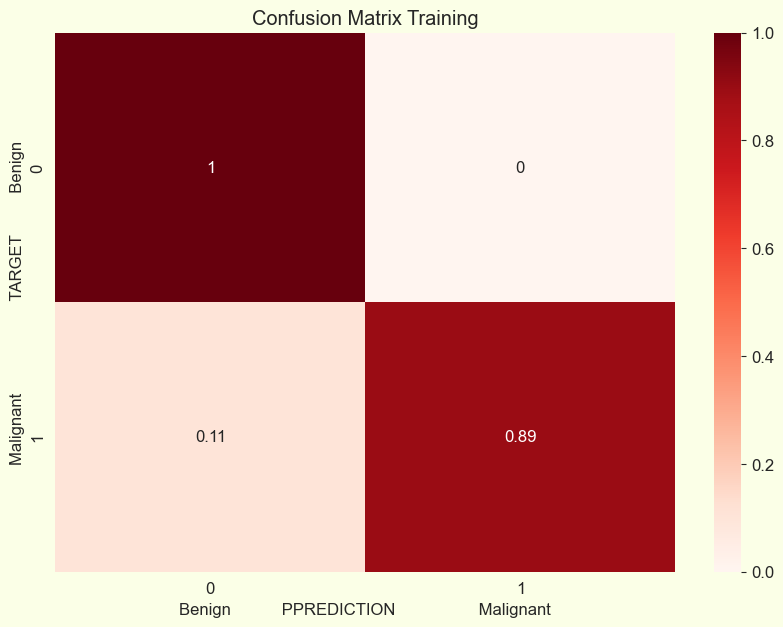

In [24]:
#This command will return training predictions and plot confusion matrix#
train_preds = predict_and_plot(train_targets, train_inputs, 'Training')

The overall accuracy is solid at 95.89%. 

However, there's a concern as the Type II error is higher than Type I error. This means in about 1 out of 10 cases, the breast cancer detection test might mistakenly show a false negative. In simpler terms, it could say a person doesn't have cancer when they actually do.

We should experiment with changing parameters to reduce Type II errors. It's generally better to have more false positives than false negatives.

Accuracy: 97.37%


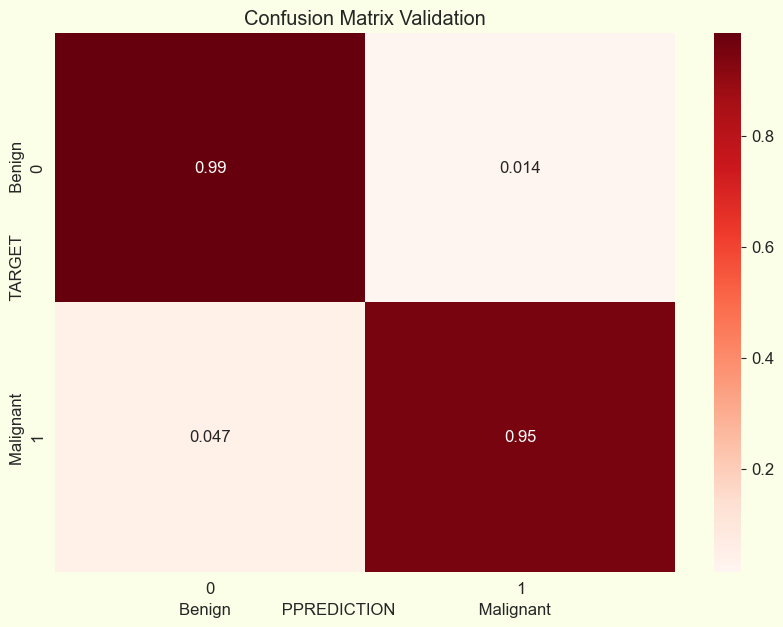

In [25]:
#This command will return validation predictions and plot confusion matrix#
val_preds = predict_and_plot(val_targets,val_inputs, 'Validation')

Probability of II type error on the Validation set is less than probability of II type error on Training set. It's a good (although could be suspicious) sign.

Accuracy: 99.12%


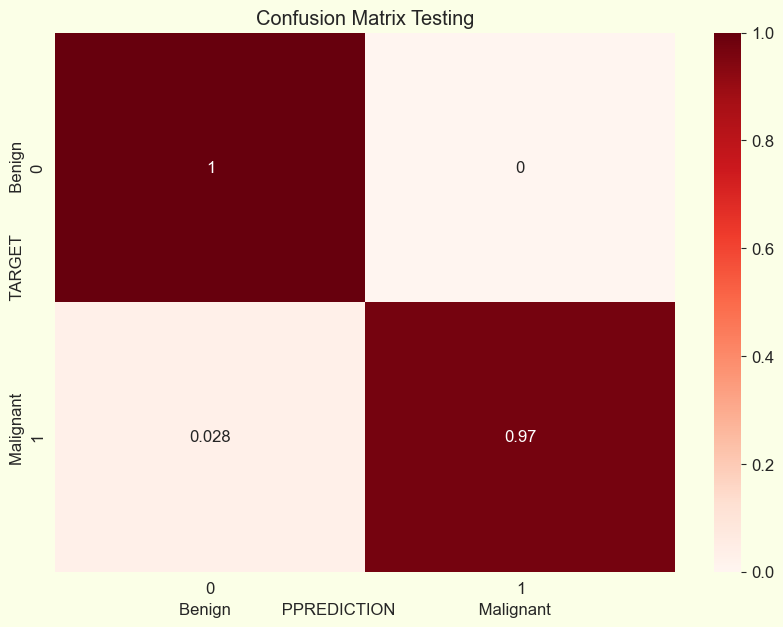

In [26]:
#This command will return testing predictions and plot confusion matrix#
test_preds = predict_and_plot(test_targets,test_inputs, 'Testing')

Accuracy of 99.12% on Testing set is greater than Accuracy on Validation set and Training set.

Also, probability of II type error on Testing set is the smallest one (compared to Training and Validation).

Those are great (although may be suspicious) results. Does it mean that our model learnt during Training and Validation process?

In [27]:
#Creating a function that takes user input (user data) and gives back a prediction along with the probability#
def predict_input(user_input):
    user_input = {key: df_inputs.mean()[key] if pd.isna(value) else value for key, value in user_input.items()}
    input_df = pd.DataFrame([user_input])
    input_df[input_cols] = scaler.transform(input_df[input_cols])
    pred = model.predict(input_df[input_cols])[0]
    prob = model.predict_proba(input_df[input_cols])[0][list(model.classes_).index(pred)]
    return pred, prob

In [28]:
#Insert your data instead of 'insert_value' in this cell.# 
#After that, in a new code cell, type 'predict_input(user_input)' and run the cell.#

user_input = {'concave points_worst':'insert_value',
             'perimeter_worst':'insert_value',
             'concave points_mean':'insert_value',
             'radius_worst':'inser_value',
             'perimeter_mean':'insert_value',
             'area_worst':'insert_value',
             'radius_mean':'insert_value',
             'area_mean':'insert_value',
             'concavity_mean':'insert_value',
             'concavity_worst':'insert_value',
             'compactness_mean':'insert_value',
             'compactness_worst':'insert_value',
             'radius_se':'insert_value',
             'perimeter_se':'insert_value',
             'area_se':'insert_value',
             'texture_worst':'insert_value',
             'smoothness_worst':'insert_value',
             'symmetry_worst':'insert_value',
             'texture_mean':'insert_value',
             'concave points_se':'insert_value',
             'smoothness_mean':'insert_value',
             'symmetry_mean':'insert_value',
             'fractal_dimension_worst':'insert_value',
             'compactness_se':'insert_value',
             'concavity_se':'insert_value'}
